In [491]:
#import osmnx as ox
import numpy as np
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import psycopg2
from shapely.geometry import LineString, Polygon, Point
from shapely import wkt
import mplleaflet
from tqdm import tqdm
import geojson
import json

In [9]:
#gdrive = ox.graph_from_place('Los Angeles, CA, USA',network_type='drive')

In [10]:
#gbike = ox.graph_from_place('Los Angeles, CA, USA',network_type='bike')

In [23]:
#import contextily as ctx

#def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
#    xmin, xmax, ymin, ymax = ax.axis()
#    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
#    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
#    ax.axis((xmin, xmax, ymin, ymax))

In [169]:
conn = psycopg2.connect("dbname=sm_gis user=karlen")
cur = conn.cursor()

In [174]:
#cur.execute("SELECT highway,maxspeed,lanes,osm_id,bicycle,width FROM planet_osm_roads lplanet_osm_roads WHERE NULLIF(bicycle, '') IS NOT NULL AND bicycle != 'no';")
#cur.execute("SELECT highway,maxspeed,lanes,osm_id,bicycle,width,shoulder FROM planet_osm_line WHERE highway != 'motorway' and highway != 'None' AND highway != 'Trunk' and highway != 'steps';")
cur.execute("SELECT highway,maxspeed,lanes,osm_id,bicycle,width,shoulder FROM planet_osm_line WHERE highway != 'trunk' and highway != 'motorway' and highway != 'trunk_link' and highway != 'motorway_link';")
roads_df = pd.DataFrame(cur.fetchall(),columns=['highway','maxspeed','lanes','id','bicycle','width','shoulder'])

,highway,maxspeed,lanes,id,bicycle,width,shoulder
0,cycleway,None,2,4341259,None,None,None
1,footway,None,None,94446292,None,None,None
2,footway,None,None,160347811,None,None,None
3,steps,None,None,285608119,None,None,None
4,steps,None,None,285608115,None,None,None
5,footway,None,None,558431970,None,None,None
6,footway,None,None,448031304,None,None,None
7,service,None,None,408470233,None,None,None
8,service,None,None,408470235,None,None,None
9,service,None,None,640616994,None,None,None


In [175]:
roads_df = roads_df.iloc[np.where(roads_df['bicycle'] != 'no')[0]]
#roads_df[id] = roads_df.id.apply(lambda x: x.astype(int))

,highway,maxspeed,lanes,id,bicycle,width,shoulder
0,cycleway,None,2,4341259,None,None,None
1,footway,None,None,94446292,None,None,None
2,footway,None,None,160347811,None,None,None
3,steps,None,None,285608119,None,None,None
4,steps,None,None,285608115,None,None,None
5,footway,None,None,558431970,None,None,None
6,footway,None,None,448031304,None,None,None
7,service,None,None,408470233,None,None,None
8,service,None,None,408470235,None,None,None
9,service,None,None,640616994,None,None,None


In [388]:
hw_keys = pd.unique(roads_df['highway'])
for k in hw_keys:
    lanes = roads_df[roads_df['highway'] == k ].lanes
    tot = len(lanes)
    lanes = lanes[lanes.values != None]
    if len(lanes.values) > 0:
       vals = [int(val.split()[0]) for val in lanes.values]
       print(k,np.size(vals)/float(tot),np.median(vals),[np.min(vals),np.max(vals)])
    else:
        print(k,'empty')

cycleway 0.04 2.0 [2, 2]
footway empty
steps empty
service 0.007653575025176234 1.0 [1, 5]
path empty
residential 0.1846114779075673 2.0 [1, 6]
pedestrian empty
tertiary 0.5521155830753354 3.0 [1, 7]
secondary 0.905727318803852 4.0 [1, 9]
unclassified 0.12857142857142856 2.0 [2, 2]
trunk_link 0.5882352941176471 1.5 [1, 3]
motorway_link 0.8680555555555556 2.0 [1, 4]
primary 0.9676172063798937 5.0 [1, 10]
secondary_link 0.6101694915254238 1.0 [1, 2]
road empty
primary_link 0.7572815533980582 1.0 [1, 3]
tertiary_link 0.25 1.5 [1, 2]
track empty
construction empty


In [133]:
#getting average speed per type
hw_keys = pd.unique(roads_df['highway'])
for k in hw_keys:
    speeds = roads_df[roads_df['highway'] == k ].maxspeed
    tot = len(speeds)
    speeds = speeds[speeds.values != None]
    if len(speeds.values) > 0:
       vals = [int(val.split()[0]) for val in speeds.values]
       print(k,np.size(vals)/float(tot),np.median(vals),[np.min(vals),np.max(vals)])
    else:
        print(k,'empty')

cycleway empty
footway empty
steps empty
service 0.005035246727089627 8.0 [5, 25]
path empty
residential 0.11934992381919757 25.0 [5, 48]
pedestrian empty
tertiary 0.47058823529411764 30.0 [20, 48]
secondary 0.16016218955904712 30.0 [20, 48]
unclassified 0.07142857142857142 20.0 [15, 25]
trunk_link 0.14705882352941177 55.0 [55, 55]
motorway_link empty
primary 0.17399710004833252 35.0 [25, 64]
secondary_link empty
road empty
primary_link 0.019417475728155338 45.5 [35, 56]
tertiary_link empty
track empty
construction empty


In [193]:
def getnodes(way_id):
    cur.execute("SELECT nodes from planet_osm_ways where id='{}'".format(way_id))
    try:
        return cur.fetchone()[0]
    except TypeError:
        return None

def get_node_coords(node_id):
    cur.execute("SELECT lon,lat from planet_osm_nodes where id='{}'".format(node_id))
    coords = cur.fetchone()
    return (coords[0]/1.E7, coords[1]/1.E7)

def get_way_coords(node_list):
    if node_list:
        coords_list = []
        for node_id in node_list:
            coords_list.append(get_node_coords(node_id))
        return LineString(coords_list)
    else:
        print('fuck')
        return None

roads_df['nodes'] = roads_df['id'].apply(getnodes)
roads_df['geometry'] = roads_df.nodes.apply(get_way_coords)

/Users/karlen/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/karlen/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [508]:
def find_nearest_seg(point, lines, thresh=20, return_dist=False):
    # Found a threshold of 20m based on looking at histogram:??
    # geocrash1.geometry.apply(lambda p,l: l.distance(p).min(), args=(bostonsegs,)).hist()
    dist = lines.distance(point)
    id = dist.idxmin()
    if return_dist:
        return id if dist[id] < thresh else np.nan,dist
    else:
        return id if dist[id] < thresh else np.nan

SL = {'cycleway': 15, 'footway' : 5, 'steps' : 0, 'service' : 30, 
      'path' : 15, 'residential':25,
       'pedestrian' : 5, 'tertiary': 30, 'secondary' : 30, 'unclassified' : 20,
       'trunk_link' : 55, 'motorway_link' : 55, 'primary': 35, 'secondary_link': 30, 'road':30,
       'primary_link' : 35, 'tertiary_link' : 30, 'track' : 0, 'construction': 30}

NL = {'cycleway': 2, 'footway' : 1, 'steps' : 1, 'service' : 2, 
      'path' : 2, 'residential': 2,
       'pedestrian' : 1, 'tertiary': 3, 'secondary' : 4, 'unclassified' : 2,
       'trunk_link' : 2, 'motorway_link' : 2, 'primary': 5, 'secondary_link': 2, 'road':2,
       'primary_link' : 2, 'tertiary_link' : 2, 'track' : 1, 'construction': 2}

def populate_speeds(highway,maxspeed):
    speeds = []
    for hw,speed in zip(highway,maxspeed):
        if speed:
            speeds.append(int(speed.split()[0]))
        else:
            speeds.append(SL[hw])
    return speeds


def populate_lanes(highway,lanes):
    l = []
    for hw,lane in zip(highway,lanes):
        if lane:
            l.append(lane)
        else:
            l.append(NL[hw])
    return l
            
#speeds = populate_speeds(roads_df['highway'],roads_df['maxspeed'])
#lanes = populate_lanes(roads_df['highway'],roads_df['lanes'])
#roads_df['speed_lim'] = speeds

#roads_df

In [748]:
roads_df['nlanes'] = lanes
#crs = {'init': 'epsg:4326'}
roads_geodf = gp.GeoDataFrame(roads_df, geometry='geometry')
roads_geodf

/Users/karlen/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,highway,maxspeed,lanes,id,bicycle,width,shoulder,speed_lim,nodes,geometry,pave_ref,nlanes
0,cycleway,None,2,4341259,None,None,None,15,"[400857855, 400864303, 400864308, 1363778082, ...","LINESTRING (-118.4824233 33.9965151, -118.4822...",31011,2.0
1,footway,None,None,94446292,None,None,None,5,"[243740311, 1097085164, 1097085252, 1097085189...","LINESTRING (-118.4773777 33.9905691, -118.4771...",19808,1.0
2,footway,None,None,160347811,None,None,None,5,"[122714157, 1723968933]","LINESTRING (-118.4768789 33.9905978, -118.4770...",19808,1.0
3,steps,None,None,285608119,None,None,None,0,"[2892740983, 2892740984]","LINESTRING (-118.499798 34.0074088, -118.49962...",28083,1.0
4,steps,None,None,285608115,None,None,None,0,"[2892740985, 2892740987]","LINESTRING (-118.4999171 34.0075224, -118.4998...",28083,1.0
5,footway,None,None,558431970,None,None,None,5,"[5994040777, 2892740983, 5599997671, 289274098...","LINESTRING (-118.4997637 34.0073498, -118.4997...",28083,1.0
6,footway,None,None,448031304,None,None,None,5,"[4450863930, 6034830164, 6034830163, 603483016...","LINESTRING (-118.4882588 34.0019518, -118.4878...",28083,1.0
7,service,None,None,408470233,None,None,None,30,"[6204947827, 4103924670, 4103924674, 4103924681]","LINESTRING (-118.4882738 34.0026192, -118.4879...",28083,2.0
8,service,None,None,408470235,None,None,None,30,"[6204947827, 4103924681]","LINESTRING (-118.4882738 34.0026192, -118.4881...",28083,2.0
9,service,None,None,640616994,None,None,None,30,"[4103924678, 6204947829, 6204947828, 410392467...","LINESTRING (-118.4876798 34.0024142, -118.4876...",28083,2.0


In [54]:
fig, ax = plt.subplots(1)
roads_geodf.plot(ax = ax)
mplleaflet.show(fig=fig)

In [572]:
roads_geodf['bicycle']

0              None
1              None
2              None
3              None
4              None
5              None
6              None
7              None
8              None
9              None
10             None
11             None
12             None
13       designated
14             None
15             None
16             None
17             None
18             None
19             None
20             None
21             None
22             None
23             None
24             None
25             None
26             None
27             None
28             None
29             None
            ...    
19545    designated
19546          None
19547          None
19548          None
19549          None
19550          None
19551          None
19552    designated
19553    designated
19554    designated
19555    designated
19556    designated
19557    designated
19558    designated
19559    designated
19560    designated
19561    designated
19562          None
19563    designated


In [176]:
#nodez = [535595810, 5762680507]
#
#roads_df2 = roads_df.iloc[np.where(roads_df['lanes'].values != None)[0]]
#roads_df2['nodes'] = roads_df2['id'].apply(getnodes)
#roads_df2['geometry'] = roads_df2.nodes.apply(get_way_coords)

/Users/karlen/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/karlen/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [177]:
#roads_geodf2 = gp.GeoDataFrame(roads_df2, geometry='geometry')
#fig, ax = plt.subplots(1)
#roads_geodf2.plot(ax = ax)
#mplleaflet.show(fig=fig)

In [737]:
base = '/Users/karlen/Work/Insight/data/raw/'
fpavcond = base+'pavement_cond.csv'
df_pavcond = pd.read_csv(fpavcond)
df_pavcond.the_geom = df_pavcond.the_geom.apply(wkt.loads)
geo_df = gp.GeoDataFrame(df_pavcond, geometry='the_geom')

In [743]:
#coords = [(-118.38, 34.0), (-118.38, 34.1), (-118.22, 34.1), (-118.22, 34.0)]
coords = [(-118.5244,33.9559),(-118.5244,34.0779),(-118.3679,34.0779),(-118.3679,33.9559)]
poly = Polygon(coords)

def crop_pav(xy):
    x = xy[0][0]
    y = xy[1][0]
    p = Point(x,y)
    return p.within(poly)

keep = []
    
geom = geo_df.the_geom

for row in tqdm(geom):
    xy = row.geoms[0].coords.xy
    keep.append(crop_pav(xy))
    
geo_df['keep'] = keep
geo_df = geo_df[geo_df.keep] # Cropped it to a smaller area




  0%|          | 0/72562 [00:00<?, ?it/s]


  1%|          | 415/72562 [00:00<00:17, 4144.32it/s]


  1%|          | 828/72562 [00:00<00:17, 4124.73it/s]


  2%|▏         | 1201/72562 [00:00<00:17, 3995.03it/s]


  2%|▏         | 1632/72562 [00:00<00:17, 4084.53it/s]


  3%|▎         | 1943/72562 [00:00<00:18, 3731.82it/s]


  3%|▎         | 2254/72562 [00:00<00:21, 3231.43it/s]


  4%|▍         | 2730/72562 [00:00<00:19, 3575.47it/s]


  4%|▍         | 3077/72562 [00:00<00:23, 2969.18it/s]


  5%|▍         | 3411/72562 [00:00<00:22, 3071.31it/s]


  5%|▌         | 3755/72562 [00:01<00:21, 3172.54it/s]


  6%|▌         | 4079/72562 [00:01<00:22, 3027.85it/s]


  6%|▌         | 4462/72562 [00:01<00:21, 3168.16it/s]


  7%|▋         | 4846/72562 [00:01<00:20, 3341.65it/s]


  7%|▋         | 5187/72562 [00:01<00:23, 2809.01it/s]


  8%|▊         | 5487/72562 [00:01<00:27, 2409.89it/s]


  8%|▊         | 5874/72562 [00:01<00:24, 2716.05it/s]


  9%|▊         | 6347/72562 [00:01<00:21, 3

 60%|█████▉    | 43463/72562 [00:14<00:08, 3371.93it/s]


 60%|██████    | 43814/72562 [00:14<00:08, 3352.23it/s]


 61%|██████    | 44159/72562 [00:14<00:09, 2921.91it/s]


 61%|██████▏   | 44471/72562 [00:14<00:09, 2978.06it/s]


 62%|██████▏   | 44933/72562 [00:14<00:08, 3330.52it/s]


 62%|██████▏   | 45320/72562 [00:14<00:07, 3474.07it/s]


 63%|██████▎   | 45792/72562 [00:15<00:07, 3772.54it/s]


 64%|██████▎   | 46227/72562 [00:15<00:06, 3928.14it/s]


 64%|██████▍   | 46641/72562 [00:15<00:06, 3988.14it/s]


 65%|██████▍   | 47051/72562 [00:15<00:06, 3774.38it/s]


 65%|██████▌   | 47439/72562 [00:15<00:07, 3320.03it/s]


 66%|██████▌   | 47788/72562 [00:15<00:09, 2641.04it/s]


 66%|██████▋   | 48177/72562 [00:15<00:08, 2919.13it/s]


 67%|██████▋   | 48652/72562 [00:15<00:07, 3300.70it/s]


 68%|██████▊   | 49096/72562 [00:16<00:06, 3573.24it/s]


 68%|██████▊   | 49579/72562 [00:16<00:05, 3874.95it/s]


 69%|██████▉   | 49998/72562 [00:16<00:05, 3845.41it/s]


 69%|██████▉  

In [750]:
geo_df.crs

{'init': 'epsg:4326'}

In [782]:
road_seg = []
for line in roads_geodf2.geometry:
    road_seg.append(find_nearest_seg(line,geo_df,5E-4))

In [783]:
roads_geodf2['pave_ref'] = road_seg

In [224]:
#print(roads_geodf.loc[19573].geometry)
roads_geodf_alt = roads_geodf.copy()

In [228]:
roads_geodf_alt['pgeo'] = roads_geodf_alt.pave_ref.apply(lambda x: geo_df.loc[x].the_geom)

In [231]:
roads_geodf_alt['geometry'] = roads_geodf_alt['pgeo']

In [839]:
roads_geodf_wpav = roads_geodf2.dropna(subset=['pave_ref'])
roads_geodf_wpav['PCI'] = roads_geodf_wpav.pave_ref.apply(lambda x: geo_df.loc[x].PCI)


/Users/karlen/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [509]:
#fig,ax = plt.subplots(1,figsize=(12,12))
#roads_geodf.plot(ax=ax,edgecolor='k')
#roads_geodf_alt.plot(ax=ax,edgecolor='b')
fcolli_tims = base + 'collisions/tims_collisions.csv'
df_col = pd.read_csv(fcolli_tims)

In [513]:
coords = [(-118.5244,33.9559),(-118.5244,34.0779),(-118.3679,34.0779),(-118.3679,33.9559)]
poly = Polygon(coords)

def crop_col(x,y):
    p = Point(x,y)
    return p.within(poly)

inds = np.where(df_col['POINT_X'])

nbins = 50

xs = np.array(df_col['POINT_X'])[inds]
ys = np.array(df_col['POINT_Y'])[inds]

df_col = df_col.loc[inds]

ind2 = ~np.isnan(xs)
xs = xs[ind2]
ys = ys[ind2]
df_col = df_col.loc[ind2]

keep_col = []
for x,y in zip(df_col['POINT_X'],df_col['POINT_Y']):
    keep_col.append(crop_col(x,y))

df_col['keep'] = keep_col
df_col = df_col[df_col.keep]
    
xs = np.array(df_col['POINT_X'])
ys = np.array(df_col['POINT_Y'])

/Users/karlen/anaconda3/envs/insight/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [514]:
df_col['GEOMETRY'] = gp.points_from_xy(df_col.POINT_X, df_col.POINT_Y)
geo_col_df = gp.GeoDataFrame(df_col, crs=crs, geometry='GEOMETRY')

In [518]:
acc_seg = []
cdlim = 0.01
for point in geo_col_df.geometry:
    acc_seg.append(find_nearest_seg(point,roads_geodf2,0.1))

In [519]:
geo_col_df['accseg']=acc_seg
acc_counts = geo_col_df.groupby('accseg')['GEOMETRY'].count()

roads_geodf2['nacc'] = 0

#seg = acc_seg[0]

#geo_col_df
#geo_df.loc[57354]
for c,ind in enumerate(acc_counts.index):
    roads_geodf2.at[ind,'nacc'] += int(acc_counts.iloc[c])

In [247]:
speeds = populate_speeds(roads_geodf['highway'],roads_geodf['maxspeed'])
roads_geodf['speed_lim'] = speeds

In [766]:
#no pavement
acc_df = roads_geodf2[roads_geodf2.nacc > 0]
acc_df = acc_df.loc[acc_df.index.repeat(acc_df['nacc'])]
acc_df.loc[:]['nacc'] = 1
noacc_df = roads_geodf2[roads_geodf2.nacc == 0]

In [845]:
#with pavement
acc_df = roads_geodf_wpav[roads_geodf_wpav.nacc > 0]
acc_df = acc_df.loc[acc_df.index.repeat(acc_df['nacc'])]
acc_df.loc[:]['nacc'] = 1
noacc_df = roads_geodf_wpav[roads_geodf_wpav.nacc == 0]

In [847]:
sampled_noacc_df = noacc_df.sample(300)
comb_df = pd.concat([acc_df,sampled_noacc_df])
comb_wlanes = comb_df[comb_df.lanes.values != None]

In [712]:
#print(acc_df.highway.groupby(acc_df.highway).count())
#roads_geodf.highway.groupby(noacc_df.highway).count()
print(acc_df.lanes.groupby(acc_df.lanes).count()/roads_geodf.lanes.groupby(noacc_df.lanes).count())

lanes
1     0.015385
10         NaN
2     0.095153
3     0.093023
4     0.142442
5     0.093548
6     0.097222
7     0.131034
8     0.117647
9          NaN
Name: lanes, dtype: float64


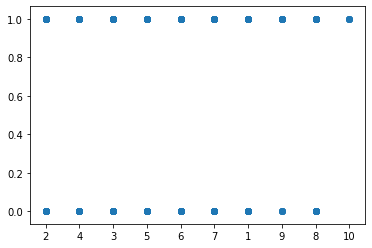

In [345]:
plt.scatter(comb_wlanes.lanes,comb_wlanes.nacc)

In [849]:
import sklearn.model_selection
from sklearn import linear_model, model_selection
X = comb_wlanes[['nlanes','speed_lim','PCI']]
#X = comb_wlanes[['speed_lim']]
y = comb_wlanes[['nacc']]

X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X,y, test_size=0.2)

In [769]:
#lrm = linear_model.LinearRegression()
#lrm.fit(X_train,y_train)

In [770]:
#for index, row in roads_geodf.iterrows():
#    print(row.values)

In [850]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train.nacc.values)

#clf = LogisticRegressionCV(cv=5, max_iter=300, solver='liblinear')#, class_weight='balanced')
clf.fit(X_train, y_train)


/Users/karlen/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [851]:
clf.score(X_valid,y_valid)

0.5483870967741935

(array([ 454.,  374.,  315., 3178., 2196., 1470.,  906.,  534.,  170.,
          21.]),
 array([0.34074587, 0.39117097, 0.44159607, 0.49202118, 0.54244628,
        0.59287138, 0.64329648, 0.69372158, 0.74414669, 0.79457179,
        0.84499689]),
 <a list of 10 Patch objects>)

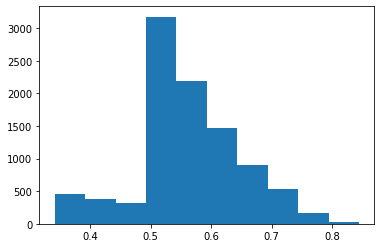

In [854]:
probs = clf.predict_proba(roads_geodf_wpav[['nlanes','speed_lim','PCI']])

acc_prob = [p[1] for p in probs]
plt.hist(acc_prob)

Text(0.5, 1.0, 'Logistic regression coefficients')

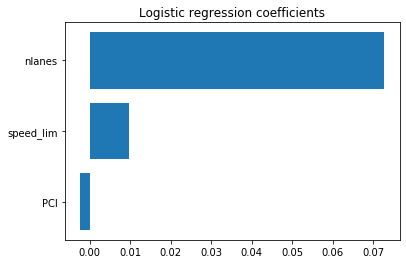

In [855]:
plt.barh(range(len(clf.coef_[0])),
         width=np.sort(clf.coef_[0]))
plt.yticks(ticks=range(len(clf.coef_[0])), labels=X.columns[np.argsort(clf.coef_[0])])
plt.title('Logistic regression coefficients')

In [722]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import roc_curve, roc_auc_score, auc
from scipy import interp

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)

classifier = LogisticRegression(solver='liblinear', max_iter=300)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0

for train, test in cv.split(X, y):
    probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
#     plt.plot(fpr, tpr, lw=1, alpha=0.3,
#              label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

/Users/karlen/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyError: "None of [Int64Index([758, 727, 168, 204, 592, 807, 725, 108, 829, 287,\n            ...\n            802, 639, 173, 485, 161, 775, 105, 618, 488, 231],\n           dtype='int64', length=178)] are in the [columns]"

In [666]:
def data2geojson(df,filename='acc_layer.geojson'):
    features = []
    
    insert_features = lambda X: features.append(            
            geojson.Feature(geometry=X['geometry'],
                            properties={'id': X['id'], 'acc_prob': X['acc_prob']}))
    
    df.apply(insert_features, axis=1)
    with open(filename, 'w', encoding='utf8') as fp:
        geojson.dump(geojson.FeatureCollection(features), fp, sort_keys=True, ensure_ascii=False)

In [500]:
#I can just use the cls.proba(X) for my probabilities...

#roads_geodf.to_crs({'init': 'epsg:4326'})

#copied over from cycle-safe

roads_geodf2['acc_prob'] = acc_prob
layer = roads_geodf2[['id','acc_prob','geometry']]

data2geojson(layer)

In [497]:
#roads_geodf['nodes'] = roads_geodf['nodes'].apply(json.dumps)
roads_geodf.to_file('roads_geodf_back.shp')

In [505]:
#roads_geodf2 = df.read_csv('roads_geodf_back.csv')
roads_geodf2 = gp.read_file('roads_geodf_back.shp')

#roads_geodf2.columns[13] = 'geometry2'

#roads_geodf2 = roads_geodf2.drop(roads_geodf2.columns[13],axis=1)
##roads_geodf2 = gp.GeoDataFrame(roads_geodf2, geometry='geometry')

In [775]:
roads_geodf2['acc_prob'] = acc_prob

In [402]:
def isNaN(num):
    return num != num


def populate_lanes(highway,lanes):
    l = []
    for hw,lane in zip(highway,lanes):
        if lane and not isNaN(lane):
            l.append(lane)
        else:
            l.append(NL[hw])
    return l

lanes = populate_lanes(roads_geodf2['highway'],roads_geodf2['lanes'])
roads_geodf2['nlanes'] = lanes

In [646]:
desi = roads_geodf2[roads_geodf2.bicycle == 'designated'].groupby(by='nacc').count().id
cts = roads_geodf2[roads_geodf2.bicycle.apply(lambda x: x is None)].groupby('nacc').count().id
roads_geodf2

,highway,maxspeed,lanes,id,bicycle,width,shoulder,speed_lim,nodes,pave_ref,nlanes,geometry,nacc,acc_prob
0,cycleway,None,2,4341259,None,None,None,15,"[400857855, 400864303, 400864308, 1363778082, ...",31011,2,"LINESTRING (-118.4824233 33.9965151, -118.4822...",0,0.248690
1,footway,None,None,94446292,None,None,None,5,"[243740311, 1097085164, 1097085252, 1097085189...",19808,1,"LINESTRING (-118.4773777 33.9905691, -118.4771...",0,0.271175
2,footway,None,None,160347811,None,None,None,5,"[122714157, 1723968933]",19808,1,"LINESTRING (-118.4768789 33.9905978, -118.4770...",0,0.271175
3,steps,None,None,285608119,None,None,None,0,"[2892740983, 2892740984]",28083,1,"LINESTRING (-118.499798 34.0074088, -118.49962...",0,0.290767
4,steps,None,None,285608115,None,None,None,0,"[2892740985, 2892740987]",28083,1,"LINESTRING (-118.4999171 34.0075224, -118.4998...",0,0.290767
5,footway,None,None,558431970,None,None,None,5,"[5994040777, 2892740983, 5599997671, 289274098...",28083,1,"LINESTRING (-118.4997637 34.0073498, -118.4997...",0,0.271175
6,footway,None,None,448031304,None,None,None,5,"[4450863930, 6034830164, 6034830163, 603483016...",28083,1,"LINESTRING (-118.4882588 34.0019518, -118.4878...",0,0.271175
7,service,None,None,408470233,None,None,None,30,"[6204947827, 4103924670, 4103924674, 4103924681]",28083,2,"LINESTRING (-118.4882738 34.0026192, -118.4879...",0,0.198352
8,service,None,None,408470235,None,None,None,30,"[6204947827, 4103924681]",28083,2,"LINESTRING (-118.4882738 34.0026192, -118.4881...",0,0.198352
9,service,None,None,640616994,None,None,None,30,"[4103924678, 6204947829, 6204947828, 410392467...",28083,2,"LINESTRING (-118.4876798 34.0024142, -118.4876...",0,0.198352


In [776]:
roads_geodf_test = roads_geodf2.copy()

def applyrule(df,rule,penalty):
    df.loc[rule,['acc_prob']] = df.loc[rule].acc_prob + penalty

def sendrules(df):
    applyrule(df, df.speed_lim > 35, 0.2)
    applyrule(df, df.speed_lim > 30, 0.15)
    applyrule(df, df.speed_lim > 25, 0.1)
    applyrule(df, df.nacc > 0, 0.2)
    applyrule(df, df.nacc > 1, 0.2)
    applyrule(df, df.bicycle == 'designated', -0.5)
    applyrule(df, (df.bicycle == 'yes') | (df.bicycle == 'permissive'), - 0.3)

In [777]:
sendrules(roads_geodf_test)
roads_geodf_test.loc[roads_geodf_test.acc_prob < 0,['acc_prob']] = 0

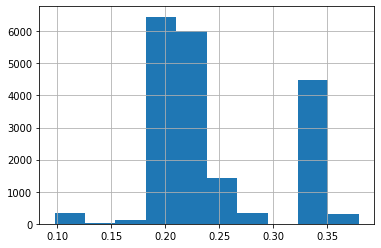

In [778]:
roads_geodf2.acc_prob.hist()

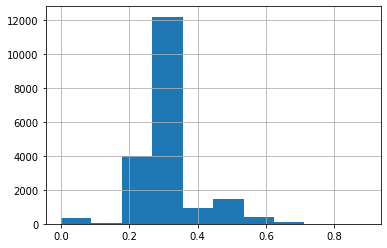

In [779]:
roads_geodf_test.acc_prob.hist()

In [781]:
layer = roads_geodf_test[['id','acc_prob','geometry']]

data2geojson(layer,filename='acc_layer2.geojson')

In [793]:
roads_geodf_test.groupby('nacc').count()

,highway,maxspeed,lanes,id,bicycle,width,shoulder,speed_lim,nodes,pave_ref,nlanes,geometry,acc_prob
nacc,,,,,,,,,,,,,
0,19216,1612,5320,19216,428,6,0,19216,19216,19216,19216,19216,19216
1,236,21,150,236,14,0,0,236,236,236,236,236,236
2,25,5,15,25,3,0,0,25,25,25,25,25,25
3,4,0,3,4,0,0,0,4,4,4,4,4,4
4,1,0,0,1,0,0,0,1,1,1,1,1,1
5,1,1,1,1,0,0,0,1,1,1,1,1,1
